In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "C:/Users/alisa/GIT/Matplotlib-challenge-The-Power-of-Plots/data/Mouse_metadata.csv"
study_results_path = "C:/Users/alisa/GIT/Matplotlib-challenge-The-Power-of-Plots/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# ----------------------Combine the data into a single dataset----------------------

Study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
Study_data_complete

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# --------------------Checking the number of mice. ----------------------- 3 way ---------- 

# 1
#mice_count_Unique = len(Study_data_complete["Mouse ID"].unique())
#mice_count_Unique 

#2 mice_count_Unique= mouse_metadata['Mouse ID'].count()
#mice_count_Unique 

# or 3
mice_count_Unique= Study_data_complete['Mouse ID'].nunique()
#mice_count_Unique

mice_count = Study_data_complete["Mouse ID"].count()
#mice_count

print(f"The dataset has {mice_count} total IDs, with {mice_count_Unique} unique mice IDs")

The dataset has 1893 total IDs, with 249 unique mice IDs


In [6]:

Study_data_complete.columns


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [7]:
# ---------------------Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. -------------------------

Study_data_complete.set_index("Mouse ID")

duplicated_id = Study_data_complete.duplicated(subset = ['Mouse ID','Timepoint'])

# duplicated_id.count()     1893

duplicateed_Mice = Study_data_complete[duplicated_id]['Mouse ID'].unique()

duplicateed_Mice


array(['g989'], dtype=object)

In [8]:
# --------------Optional: Get all the data for the duplicate mouse ID. --------------g989

duplicates = Study_data_complete[duplicated_id]
duplicates.head()
# duplicates.count()        -----------  5

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
#--------------------------- Create a clean DataFrame by dropping the duplicate mouse by its ID. ----------------------

#df.drop_duplicates(subset=[‘Color’]) --------- drop 5 item g989

Study_data_complete_clear = Study_data_complete.drop_duplicates(subset = ['Mouse ID','Timepoint'])

Study_data_complete_clear

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
#Checking the number of mice in the clean DataFrame.
mice_count_Unique_clear= Study_data_complete_clear['Mouse ID'].nunique()
#mice_count_Unique

mice_count_clear = Study_data_complete_clear["Mouse ID"].count()
#mice_count

print(f"The dataset has {mice_count_clear} total IDs, with {mice_count_Unique_clear} unique mice IDs")


The dataset has 1888 total IDs, with 249 unique mice IDs


In [11]:
#--------------------------------------------------------Summary Statistics-----------------------------------------------

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen  --standard error of the mean
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
 
Mean_Tumor_Volume = Study_data_complete_clear.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume = Study_data_complete_clear.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_Tumor_Volume = Study_data_complete_clear.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviatio_Tumor_Volume = Study_data_complete_clear.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Sem_Tumor_Volume = Study_data_complete_clear.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
                                                        

In [12]:
Summary_Statistics = pd.DataFrame({
    
    'Mean':Mean_Tumor_Volume,
    'Median':Median_Tumor_Volume,
    'Variance':variance_Tumor_Volume,
    'Standard Deviation':standard_deviatio_Tumor_Volume,
    'SEM':Sem_Tumor_Volume
})
Summary_Statistics
Summary_Statistics.head(10)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

single_Summary_Statistics = Study_data_complete_clear.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
single_Summary_Statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


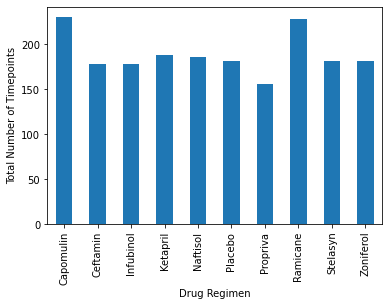

<Figure size 432x288 with 0 Axes>

In [39]:
#----------------------------------------Bar and Pie Charts-------------------------------------
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_count = Study_data_complete_clear.groupby('Drug Regimen')["Timepoint"].count()
#timepoints_count
timepoints_chart = timepoints_count.plot(kind='bar', y = 'Total Number of Timepoints')
timepoints_chart.set_xlabel("Drug Regimen")
timepoints_chart.set_ylabel("Total Number of Timepoints")


plt.show()

plt.tight_layout()


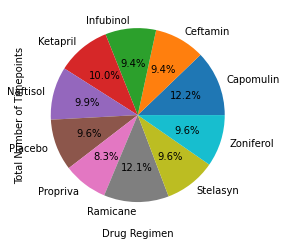

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_count = Study_data_complete_clear.groupby('Drug Regimen')["Timepoint"].count()
#timepoints_count
timepoints_chart = timepoints_count.plot(kind='pie',autopct="%1.1f%%", y = 'Total Number of Timepoints')
timepoints_chart.set_xlabel("Drug Regimen")
timepoints_chart.set_ylabel("Total Number of Timepoints")


plt.show()
plt.tight_layout()



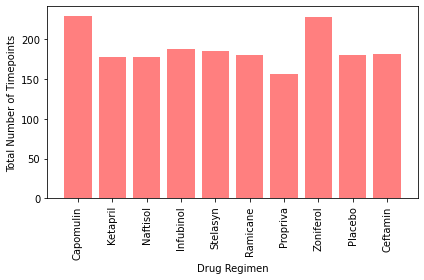

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(Study_data_complete_clear.groupby('Drug Regimen')["Timepoint"]))
drug = Study_data_complete_clear["Drug Regimen"].unique()
tick_locations = [value for value in x_axis]
plt.bar(drug , timepoints_count ,color='r', alpha=0.5, align="center" )
plt.xticks(tick_locations, drug, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.tight_layout()
plt.show()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mouse_count_sex = Study_data_complete_clear.groupby('Sex')["Mouse ID"].count()
Mouse_count_sex

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

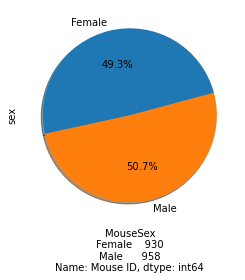

<Figure size 432x288 with 0 Axes>

In [18]:
Mouse_count_sex = Study_data_complete_clear.groupby('Sex')["Mouse ID"].count()
Mouse_count_sex
Mouse_sex_chart = Mouse_count_sex.plot(kind='pie',autopct="%1.1f%%",startangle=15, shadow = True, y = 'Total Number of Mouse')
Mouse_sex_chart.set_xlabel("Mouse"+str(Mouse_count_sex))
Mouse_sex_chart.set_ylabel("sex")


plt.show()
plt.tight_layout()

([<matplotlib.patches.Wedge at 0x1e934b1a400>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Female'),
  Text(0.025622792083347525, -1.099701537930112, 'Male')],
 [Text(-0.013976124569910401, 0.5998372011987972, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

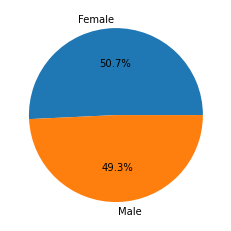

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = Study_data_complete_clear["Sex"].unique()
plt.pie(Study_data_complete_clear["Sex"].value_counts(),labels = labels ,autopct="%1.1f%%", shadow=False, startangle=0)

In [20]:
#--------------------------------------------------Quartiles, Outliers and Boxplots----------------------------
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
Final_Tumor_Volume = Study_data_complete_clear.loc[Study_data_complete_clear["Timepoint"]==45]
Final_Tumor_Volume


# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1763,n364,45,31.095335,1,Ramicane,Male,4,17
1764,b128,45,38.982878,2,Capomulin,Female,9,22
1765,l661,45,59.851956,3,Ceftamin,Male,18,26
1766,y865,45,64.729837,3,Ceftamin,Male,23,26
1767,y769,45,68.594745,4,Ceftamin,Female,6,27
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [21]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_Tumor_Volume = Final_Tumor_Volume.loc[(Final_Tumor_Volume["Drug Regimen"]=="Capomulin"),:]
Capomulin_Tumor_Volume 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1764,b128,45,38.982878,2,Capomulin,Female,9,22
1769,t565,45,34.455298,0,Capomulin,Female,20,17
1771,l509,45,41.483008,3,Capomulin,Male,17,21
1777,g288,45,37.074024,1,Capomulin,Male,3,19
1788,r554,45,32.377357,3,Capomulin,Female,8,17
1791,g316,45,40.159220,2,Capomulin,Female,22,22
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1800,m957,45,33.329098,1,Capomulin,Female,3,19
1817,l897,45,38.846876,1,Capomulin,Male,17,19
1821,v923,45,40.658124,2,Capomulin,Female,19,21


In [22]:
Ramicane_Tumor_Volume = Final_Tumor_Volume.loc[(Final_Tumor_Volume["Drug Regimen"]=="Ramicane"),:]
Ramicane_Tumor_Volume 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1763,n364,45,31.095335,1,Ramicane,Male,4,17
1773,a411,45,38.407618,1,Ramicane,Male,3,22
1776,q597,45,45.220869,2,Ramicane,Male,20,25
1780,i334,45,36.374510,2,Ramicane,Female,8,20
1795,s508,45,30.276232,0,Ramicane,Male,1,17
1799,z578,45,30.638696,0,Ramicane,Male,11,16
1801,e662,45,40.659006,2,Ramicane,Male,8,24
1808,m546,45,30.564625,1,Ramicane,Male,18,16
1814,k403,45,22.050126,1,Ramicane,Male,21,16
1822,c758,45,33.397653,1,Ramicane,Male,9,17


In [23]:
Infubinol_Tumor_Volume = Final_Tumor_Volume.loc[(Final_Tumor_Volume["Drug Regimen"]=="Infubinol"),:]
Infubinol_Tumor_Volume 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1779,y163,45,67.685569,3,Infubinol,Female,17,27
1781,c139,45,72.226731,2,Infubinol,Male,11,28
1784,z581,45,62.754451,3,Infubinol,Female,24,25
1786,a251,45,65.525743,1,Infubinol,Female,21,25
1789,k483,45,66.196912,3,Infubinol,Female,20,30
1794,a685,45,66.083066,3,Infubinol,Male,8,30
1802,e476,45,62.435404,1,Infubinol,Male,23,26
1804,a203,45,67.973419,2,Infubinol,Female,20,23
1806,f345,45,60.918767,1,Infubinol,Male,23,26


In [24]:
Ceftamin_Tumor_Volume = Final_Tumor_Volume.loc[(Final_Tumor_Volume["Drug Regimen"]=="Ceftamin"),:]
Ceftamin_Tumor_Volume 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1765,l661,45,59.851956,3,Ceftamin,Male,18,26
1766,y865,45,64.729837,3,Ceftamin,Male,23,26
1767,y769,45,68.594745,4,Ceftamin,Female,6,27
1772,j296,45,61.849023,3,Ceftamin,Female,24,30
1790,w151,45,67.527482,3,Ceftamin,Male,24,25
1810,l471,45,67.748662,1,Ceftamin,Female,7,28
1855,x581,45,64.634949,3,Ceftamin,Female,19,28
1856,a275,45,62.999356,3,Ceftamin,Female,20,28
1858,k210,45,68.923185,3,Ceftamin,Male,15,28
1862,x822,45,61.386660,3,Ceftamin,Male,3,29


In [25]:
#-----------------continue------------------------Quartiles, Outliers and Boxplots--------------------------
Capomulin_Tumor_Volume['Tumor Volume (mm3)'].describe()

count    21.000000
mean     36.236114
std       5.608969
min      23.343598
25%      32.377357
50%      37.311846
75%      40.159220
max      47.685963
Name: Tumor Volume (mm3), dtype: float64

In [26]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
for drug in drugs:
    quartiles = Final_Tumor_Volume.loc[Final_Tumor_Volume['Drug Regimen'] == drug, ['Mouse ID', 'Tumor Volume (mm3)']]['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    print(f"lowerq is {lowerq} and upperq is {upperq}.     (quartiles[0.25]) and quartiles[0.75]") 
    print(f"iqr is {iqr} and upperq is {upperq}.       (upperq-lowerq)")
    print(f"lower_bound is {lower_bound} and upper_bound is {upper_bound}.   ( lowerq - (1.5*iqr) and upperq + (1.5*iqr )") 
    
    print(f"Values below {lower_bound} could be outliers for treatment {drug}.")
    print(f"Values above {upper_bound} could be outliers for treatment {drug}.")
    outlier_occupancy = Final_Tumor_Volume.loc[(Final_Tumor_Volume['Drug Regimen'] == drug) & ((Final_Tumor_Volume['Tumor Volume (mm3)'] < lower_bound) | (Final_Tumor_Volume['Tumor Volume (mm3)'] > upper_bound))]
    print(outlier_occupancy)
    print('-'*45)

lowerq is 32.37735684 and upperq is 40.1592203.     (quartiles[0.25]) and quartiles[0.75]
iqr is 7.781863460000004 and upperq is 40.1592203.       (upperq-lowerq)
lower_bound is 20.70456164999999 and upper_bound is 51.83201549.   ( lowerq - (1.5*iqr) and upperq + (1.5*iqr )
Values below 20.70456164999999 could be outliers for treatment Capomulin.
Values above 51.83201549 could be outliers for treatment Capomulin.
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
---------------------------------------------
lowerq is 30.981175225 and upperq is 38.5083053075.     (quartiles[0.25]) and quartiles[0.75]
iqr is 7.527130082500001 and upperq is 38.5083053075.       (upperq-lowerq)
lower_bound is 19.69048010125 and upper_bound is 49.79900043125001.   ( lowerq - (1.5*iqr) and upperq + (1.5*iqr )
Values below 19.69048010125 could be outliers for treatment Ramicane.
Values above 49.79900043125001 could be outl

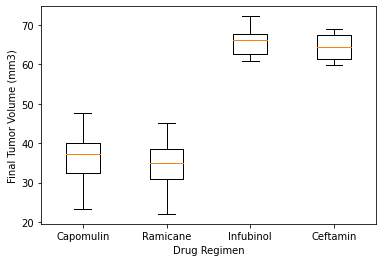

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin_tumors = Final_Tumor_Volume.loc[Final_Tumor_Volume['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Tumor Volume (mm3)']]['Tumor Volume (mm3)']
Ramicane_tumors = Final_Tumor_Volume.loc[Final_Tumor_Volume['Drug Regimen'] == 'Ramicane', ['Mouse ID', 'Tumor Volume (mm3)']]['Tumor Volume (mm3)']
Infubinol_tumors = Final_Tumor_Volume.loc[Final_Tumor_Volume['Drug Regimen'] == 'Infubinol', ['Mouse ID', 'Tumor Volume (mm3)']]['Tumor Volume (mm3)']
Ceftamin_tumors =  Final_Tumor_Volume.loc[Final_Tumor_Volume['Drug Regimen'] == 'Ceftamin', ['Mouse ID', 'Tumor Volume (mm3)']]['Tumor Volume (mm3)']

data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
labels = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=labels, widths = 0.4,vert=True)
plt.show()



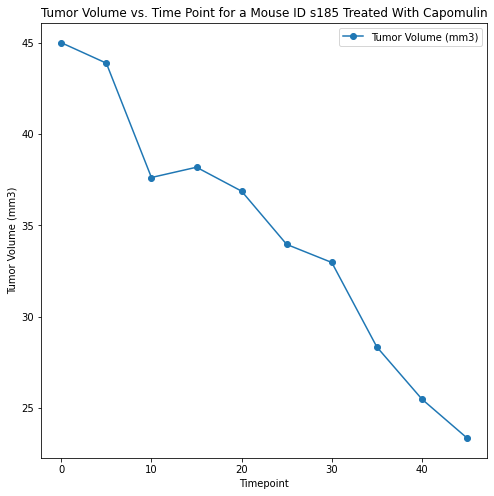

In [28]:
#----------------Line and Scatter Plots -----------------------
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = 's185'
drug_regimen = 'Capomulin'
mouse_id_data = Study_data_complete_clear.loc[(Study_data_complete_clear['Mouse ID'] == mouse_id) & (Study_data_complete_clear['Drug Regimen'] == drug_regimen), ['Tumor Volume (mm3)', 'Timepoint']]

mouse_id_data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", marker = "o", figsize=(8,8),
              title="Tumor Volume vs. Time Point for a Mouse ID s185 Treated With Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

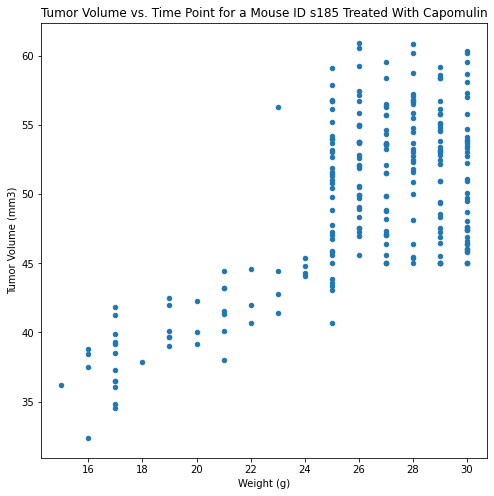

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_scatter= Study_data_complete_clear.groupby(['Mouse ID']).mean()[['Tumor Volume (mm3)', 'Weight (g)']]

capomulin_scatter.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", marker = "o", figsize=(8,8), title="Tumor Volume vs. Time Point for a Mouse ID s185 Treated With Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


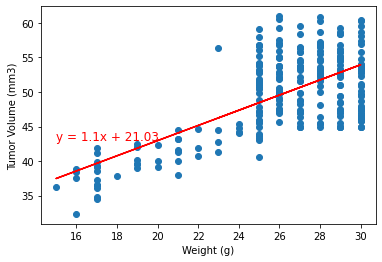

The rvalue, correlation coefficient, is: 0.6588895715215249


In [30]:
#-------------------------------------Correlation and Regression----------------------------
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_axis = capomulin_scatter['Weight (g)']
y_axis = capomulin_scatter['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(15,43),fontsize=12,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
print (f"The rvalue, correlation coefficient, is: {rvalue}")
